In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pickle

# Load the dataset
data = pd.read_csv("D:\PROJECT SQUAD\MAIN PROJECT\heart_.csv")

In [2]:



# Define features and target
X = data[['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak',
          'Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'FastingBS']]
y = data['HeartDisease']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define preprocessing steps for numerical and categorical features
numeric_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
categorical_features = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'FastingBS']

In [3]:


numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Append classifier to preprocessing pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression())])

# Fit the model
clf.fit(X_train, y_train)



Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'RestingBP',
                                                   'Cholesterol', 'MaxHR',
                                                   'Oldpeak']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Sex', 'ChestPainType',
                                                   'RestingECG',
                                                   'ExerciseAngina', 'ST_Slope',
                                                   'FastingBS'])])),
                ('classifier', LogisticRegression())])

In [4]:

# Save the model to a file
with open('heart_disease_model.pkl', 'wb') as file:
    pickle.dump(clf, file)

In [5]:
# Load the model from the saved file
with open('heart_disease_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)
# Load the sample input data (replace this with your actual sample data)
sample_data = pd.DataFrame({
    'Age': [40],
    'RestingBP': [120],
    'Cholesterol': [200],
    'MaxHR': [180],
    'Oldpeak': [0.8],
    'Sex': [0],  # Assuming 1 for male, 0 for female
    'ChestPainType': [1],
    'RestingECG': [1],
    'ExerciseAngina': [1],
    'ST_Slope': [1],
    'FastingBS': [0]
})

# Test the model with the sample input
prediction = loaded_model.predict(sample_data)
print(f"Predicted class for sample data: {prediction}")

Predicted class for sample data: [0]


In [6]:
# Load the sample input data (replace this with your actual sample data)
sample_data = pd.DataFrame({
    'Age': [55],
    'RestingBP': [140],
    'Cholesterol': [240],
    'MaxHR': [160],
    'Oldpeak': [1.2],
    'Sex': [0],  # Assuming 1 for male, 0 for female
    'ChestPainType': [2],
    'RestingECG': [0],
    'ExerciseAngina': [1],
    'ST_Slope': [2],
    'FastingBS': [1]
})

# Test the model with the sample input
prediction = loaded_model.predict(sample_data)
print(f"Predicted class for sample data: {prediction}")

Predicted class for sample data: [1]


In [7]:
# Create a DataFrame containing both the sample data and individuals without heart disease
sample_data_with_hdd = pd.DataFrame({
    'Age': [55, 40],  # Sample ages of individuals with and without heart disease
    'RestingBP': [140, 120],  # Sample resting blood pressure of individuals with and without heart disease
    'Cholesterol': [240, 200],  # Sample cholesterol levels of individuals with and without heart disease
    'MaxHR': [160, 180],  # Sample maximum heart rates of individuals with and without heart disease
    'Oldpeak': [1.2, 0.8],  # Sample old peak values of individuals with and without heart disease
    'Sex': [1, 0],  # Assuming 1 for male, 0 for female for both samples
    'ChestPainType': [2, 1],  # Sample chest pain types of individuals with and without heart disease
    'RestingECG': [0, 1],  # Sample resting ECG results of individuals with and without heart disease
    'ExerciseAngina': [1, 0],  # Sample exercise-induced angina of individuals with and without heart disease
    'ST_Slope': [2, 1],  # Sample ST slope of individuals with and without heart disease
    'FastingBS': [1, 0]  # Sample fasting blood sugar levels of individuals with and without heart disease
})

# Test the model with the sample input
prediction = loaded_model.predict(sample_data_with_hdd)

# Add the prediction results to the DataFrame
sample_data_with_hdd['Predicted_HeartDisease'] = prediction

# Filter individuals without heart disease
no_heart_disease_df = sample_data_with_hdd[sample_data_with_hdd['Predicted_HeartDisease'] == 0]

print("Individuals without heart disease:")
print(no_heart_disease_df)

# Filter individuals with heart disease
heart_disease_df = sample_data_with_hdd[sample_data_with_hdd['Predicted_HeartDisease'] == 1]

print("Individuals predicted to have heart disease:")
print(heart_disease_df)


Individuals without heart disease:
   Age  RestingBP  Cholesterol  MaxHR  Oldpeak  Sex  ChestPainType  \
1   40        120          200    180      0.8    0              1   

   RestingECG  ExerciseAngina  ST_Slope  FastingBS  Predicted_HeartDisease  
1           1               0         1          0                       0  
Individuals predicted to have heart disease:
   Age  RestingBP  Cholesterol  MaxHR  Oldpeak  Sex  ChestPainType  \
0   55        140          240    160      1.2    1              2   

   RestingECG  ExerciseAngina  ST_Slope  FastingBS  Predicted_HeartDisease  
0           0               1         2          1                       1  


In [8]:
# Fit the model
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)


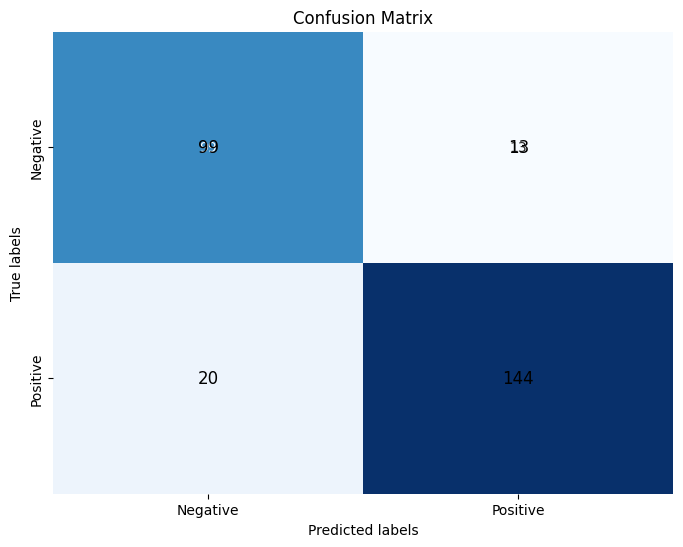

Accuracy: 0.8804347826086957
Confusion Matrix:
[[ 99  13]
 [ 20 144]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.88      0.86       112
           1       0.92      0.88      0.90       164

    accuracy                           0.88       276
   macro avg       0.87      0.88      0.88       276
weighted avg       0.88      0.88      0.88       276



In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming you have the confusion matrix stored in conf_matrix
# Ensure all values are integers and convert it to a numpy array
conf_matrix = conf_matrix.astype(int)

# Visualize the confusion matrix with customized annotations
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, cmap='Blues', cbar=False, annot=True, fmt='d')
for i in range(len(conf_matrix)):
    for j in range(len(conf_matrix)):
        plt.text(j + 0.5, i + 0.5, conf_matrix[i, j], ha='center', va='center', color='black', fontsize=12)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.xticks(ticks=[0.5, 1.5], labels=['Negative', 'Positive'])
plt.yticks(ticks=[0.5, 1.5], labels=['Negative', 'Positive'])
plt.show()

# Visualize Classification Report
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')


C:\Users\pnand\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\matplotlib\cm.py:494: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


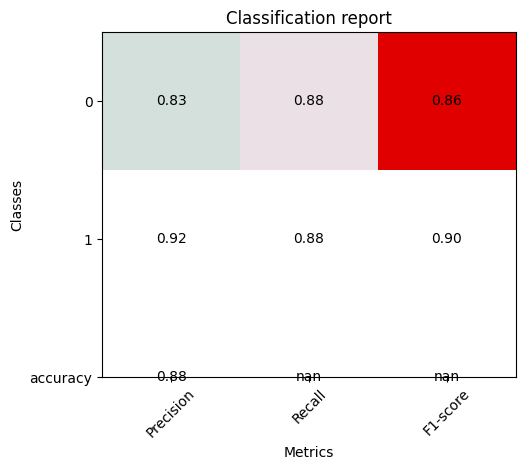

In [10]:
import matplotlib.pyplot as plt
import numpy as np

def plot_classification_report(classification_rep, title='Classification report', cmap='RdBu'):
    lines = classification_rep.split('\n')
    classes = []
    plotMat = []
    for line in lines[2: (len(lines) - 3)]:
        t = line.split()
        if len(t) > 0:
            classes.append(t[0])
        if len(t) > 1:
            v = [float(x) for x in t[1: len(t) - 1]]
            plotMat.append(v)
    # Find the length of the longest row in plotMat
    max_length = max(len(row) for row in plotMat)
    # Pad shorter rows with NaN values to match the length of the longest row
    plotMat = [row + [np.nan] * (max_length - len(row)) for row in plotMat]
    fig, ax = plt.subplots()
    plotMat = np.array(plotMat)  # Convert to numpy array
    ax.imshow(np.expand_dims(plotMat, axis=0), interpolation='nearest', cmap=cmap)  # Expand dimensions to make it homogeneous
    ax.set_title(title)
    ax.set_xticks(np.arange(3))
    ax.set_yticks(np.arange(len(classes)))
    ax.set_xticklabels(['Precision', 'Recall', 'F1-score'], rotation=45)
    ax.set_yticklabels(classes)
    for i in range(len(classes)):
        for j in range(3):
            ax.text(j, i, format(plotMat[i][j], '.2f'), ha='center', va='center', color='black')
    plt.xlabel('Metrics')
    plt.ylabel('Classes')
    plt.tight_layout()
    plt.show()

# # Example usage:
# classification_rep = """
#              precision    recall  f1-score   support

#           0       0.83      0.88      0.86       112
#           1       0.92      0.88      0.90       164
         
# avg / total       0.88      0.88      0.88       276
# """

plot_classification_report(classification_rep)
